## 学号后两位数为01
## 函数为 x^2+3xy+2.5y^2-0.5x-0.5y

In [20]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

### 共轭梯度法

In [35]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx = 0.01,    ### precision for step size
        ϵf = 0.01, 
        ϵg = 0.01, 
        debug = false)
    
    n, m = size(h)    ### check arguments（参数）
    if n ≠ m
        error("ERROR: Matrix H is not square!")
    end
    steps = []
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    ### xkplus1 = xk .+ δ
    ### fn = f(xkplus1...)
    ### gn = g(xkplus1...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        xkplus1 = xk.+δ    ### 此处加“.”可支持大量的运算
        push!(steps, xkplus1)
        fn = f(xkplus1...)
        gn = g(xkplus1...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        if (norm(gn)<=ϵg)    ### convegence?
            println("Convergence is reached after ", i, " iterations.")
            return xkplus1, fn, gn, steps
        end
        xk = xkplus1
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xkplus1, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
        end    ### println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [37]:
xkplus1, fn, gn, steps=
ConjugateGradientFSO(
    (x,y)->x^2+3x*y+2.5y^2-0.5x-0.5y,
    (x,y)->[2x+3y-0.5,3x+5y-0.5],
    [2 3;3 5],
    [1.,1.],
    debug=false
)

Convergence is reached after 2 iterations.


([1.0, -0.5], -0.125, [-4.44089e-16, -8.88178e-16], Any[[1.0, 1.0], [0.343348, -0.0944206], [1.0, -0.5]])

In [38]:
steps

3-element Array{Any,1}:
 [1.0, 1.0]            
 [0.343348, -0.0944206]
 [1.0, -0.5]           

### 可变步长牛顿法

In [39]:
### Inexact method
###φ(α)<= φ(0) + ϵα φ'(0)
###φ'(0) = d'*g
function search_for_alpha(f,xk,fk,d,g;α0 = 100,ϵ = 0.5,t = 0.5)
    α = α0
    φ0 = d'*g
    while f((xk .+α*d )...) > fk + ϵ*α*φ0
        α = t*α
    end
    return α
end

search_for_alpha (generic function with 1 method)

In [40]:
function Resizable_Newton(f,g,h,x0;
        ϵx=0.01,  
        ϵf=0.01, 
        ϵg=0.01,  
        maxIterations=128,
        debug = false
        )
    xk = x0
    fk = f(xk...)
    q = []
    for i in 1:maxIterations
        push!(q,xk)
        gk = g(xk...)
        d = -inv(h(xk...))*gk     
        α = search_for_alpha(f,xk,fk,d,gk,α0=1) 
        δ = α*d   
        xkplus1 = xk .+ δ  
        fn = f(xkplus1...)
        if (norm(δ)<= ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)   
            println("Convergence is reached after ",i," interation")  
            return xk,fk,d,q
        end
        if debug
            println("i=",i,"α=",α,"xk =",xk,"xkplus1=",xkplus1,"d = ",d,"δ = ",δ)
            println("fk=",fk,"fn=",fn)
        end
        xk = xkplus1
        fk = fn
    end
    println("WARN:",maxIterations,"iterations have been exceeded!")
end

Resizable_Newton (generic function with 1 method)

In [41]:
xk,fk,d,q = 
Resizable_Newton(
    (x,y)->x^2+3x*y+2.5y^2-0.5x-0.5y,
    (x,y)->[2x+3y-0.5,3x+5y-0.5],
    (x,y)->[2 3;3 5],
    [1.,1.],
    debug=false
    )

Convergence is reached after 2 interation


([1.0, -0.5], -0.125, [-3.55271e-15, 1.77636e-15], Any[[1.0, 1.0], [1.0, -0.5]])

In [42]:
q

2-element Array{Any,1}:
 [1.0, 1.0] 
 [1.0, -0.5]

### 最速下降法

In [43]:
function steepest_descent(f,g,x0;
        ϵx=0.01, 
        ϵf=0.01,  
        ϵg=0.01,  
        maxIterations=128,
        debug = false
        )
    p = []
    xk = x0
    fk = f(xk...)
    for i in 1:maxIterations
        push!(p,xk)
        d = -g(xk...)
        α = search_for_alpha(f,xk,fk,d,-d)      
        δ = α*d  
        xkplus1 = xk.+δ
        fn = f(xkplus1...)
        if (norm(δ)<= ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)    
            println("Convergence is reached after ",i," interation") 
            return xk,fk,d,p
        end
        if debug
            println("i=",i,"α=",α,"xk =",xk,"d = ",d,"δ = ",δ)
        end
        xk = xkplus1
        fk = fn
    end
    println("WARN:",maxIterations,"iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

In [44]:
xk,fk,d,p = 
steepest_descent(
    (x,y)->x^2+3x*y+2.5y^2-0.5x-0.5y,
    (x,y)->[2x+3y-0.5,3x+5y-0.5],
    [1.,1.],
    debug=false
    )

Convergence is reached after 50 interation


([0.947494, -0.468233], -0.1247241428639902, [0.00970915, -0.00131992], Any[[1.0, 1.0], [0.560547, 0.267578], [0.421501, 0.0215302], [0.381697, -0.0636412], [0.37462, -0.0955636], [0.381935, -0.124087], [0.466617, -0.143905], [0.46632, -0.179125], [0.507232, -0.180428], [0.51247, -0.203779]  …  [0.917423, -0.445952], [0.918011, -0.450349], [0.929748, -0.452138], [0.929447, -0.454927], [0.931746, -0.460282], [0.935135, -0.459077], [0.940572, -0.466907], [0.942484, -0.465655], [0.94717, -0.465333], [0.947494, -0.468233]])

In [45]:
p

50-element Array{Any,1}:
 [1.0, 1.0]            
 [0.560547, 0.267578]  
 [0.421501, 0.0215302] 
 [0.381697, -0.0636412]
 [0.37462, -0.0955636] 
 [0.381935, -0.124087] 
 [0.466617, -0.143905] 
 [0.46632, -0.179125]  
 [0.507232, -0.180428] 
 [0.51247, -0.203779]  
 [0.579967, -0.218245] 
 [0.579459, -0.232764] 
 [0.59484, -0.261888]  
 ⋮                     
 [0.907288, -0.448133] 
 [0.910201, -0.446297] 
 [0.917423, -0.445952] 
 [0.918011, -0.450349] 
 [0.929748, -0.452138] 
 [0.929447, -0.454927] 
 [0.931746, -0.460282] 
 [0.935135, -0.459077] 
 [0.940572, -0.466907] 
 [0.942484, -0.465655] 
 [0.94717, -0.465333]  
 [0.947494, -0.468233] 

### 画图

In [46]:
using Gadfly

In [47]:
### 共轭梯度法
scatter1=
layer(x=[ steps[i][1] for i in 1:length(steps)],
y=[ steps[i][2] for i in 1:length(steps)],
   label=[ string(i) for i in 1:length(steps)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"red"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, -0.0944206, -0.5],:label=>["1", "2", "3"],:x=>[1.0, 0.343348, 1.0]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,0.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Hel

In [48]:
### 可变步长牛顿法
scatter2=
layer(x=[ q[i][1] for i in 1:length(q)],
y=[ q[i][2] for i in 1:length(q)],
   label=[ string(i) for i in 1:length(q)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"green"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, -0.5],:label=>["1", "2"],:x=>[1.0, 1.0]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.502,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Helvetica Neue','Helvetica',

In [49]:
### 最速下降法
scatter3=
layer(x=[ p[i][1] for i in 1:length(p)],
y=[ p[i][2] for i in 1:length(p)],
   label=[ string(i) for i in 1:length(p)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"black"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.267578, 0.0215302, -0.0636412, -0.0955636, -0.124087, -0.143905, -0.179125, -0.180428, -0.203779  …  -0.445952, -0.450349, -0.452138, -0.454927, -0.460282, -0.459077, -0.466907, -0.465655, -0.465333, -0.468233],:label=>["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"  …  "41", "42", "43", "44", "45", "46", "47", "48", "49", "50"],:x=>[1.0, 0.560547, 0.421501, 0.381697, 0.37462, 0.381935, 0.466617, 0.46632, 0.507232, 0.51247  …  0.917423, 0.918011, 0.929748, 0.929447, 0.931746, 0.935135, 0.940572, 0.942484, 0.94717, 0.947494]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,F

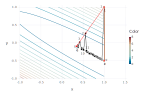

In [54]:
fun=layer((x,y)->x^2+3x*y+2.5y^2-0.5x-0.5y, -1, 1, -1, 1);
plot(fun,scatter1,scatter2,scatter3)

## 可能因为有两种方法得到的结果过太过相近，所以只能看到两条明显的结果（也可能是我做错了）